In [11]:
%load_ext autoreload
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%autoreload 2
import FEMOL
import numpy as np
np.set_printoptions(linewidth=200)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, griddata
import meshio

# Development Notebook for the FEMOL Project

In [77]:
# Square mesh
mesh = FEMOL.mesh.rectangle_Q4(1, 1, 20, 20)
# laminates and materials
plies1 = [0, 0, 0, 0]
plies2 = [90, 90]
flax = FEMOL.materials.general_flax()
carbon = FEMOL.materials.general_carbon()
layup1 = FEMOL.laminate.Layup(material=flax, plies=plies1, symetric=True)
layup2 = FEMOL.laminate.Layup(material=carbon, plies=plies2, symetric=False, h_core=0, z_core= 0.05 + carbon.hi)
# FEM problem definition
problem = FEMOL.FEM_Problem(mesh=mesh, physics='modal', model='plate')
problem.define_materials(flax, carbon)
problem.define_tensors(layup1, layup2)  # thick=1
# First modal solve
w, v = problem.solve(filtre=0)


solving using scipy
solved in :  4.512839078903198  s


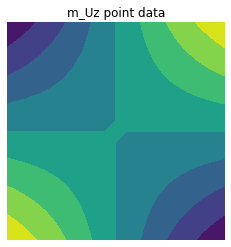

In [80]:
mesh.add_mode('m', v[2], 6)
mesh.wrap('m')
mesh.plot.point_data('m_Uz')
ref_vector = v[2]

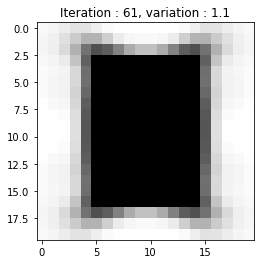

KeyboardInterrupt: 

In [119]:
# solve the SIMP problem
SIMP = FEMOL.SIMP_VIBE(Problem=problem, objective='max eig')
mesh = SIMP.solve(ref_vector, save=False, plot=True, converge=0.01)



In [118]:
SIMP.lmbds

[53.27574152153362,
 54.63334538268403,
 55.84674115333241,
 56.99407046925716,
 58.09854567831891,
 59.152641870504524,
 60.13170427645435,
 61.01027169640977,
 61.78221619525085,
 62.47348056002141,
 63.128173139820085,
 63.76430596263907,
 64.43455745817761,
 65.16031888122232,
 65.95078398692866,
 66.76279723467859,
 67.58893361752132,
 68.37683307960388,
 69.0763721711505,
 69.70506794834863,
 70.26310904039873,
 70.74943324032638,
 71.14349884878914,
 71.43879875022417,
 71.67401202403644,
 71.8608043098713,
 72.00751085713735,
 72.12213893712799,
 72.21176296640334,
 72.28224544951507,
 72.3382836390431,
 72.38353983804664,
 72.42080239301431,
 72.4521327280366,
 72.47899330817572,
 72.50246837960705,
 72.52331396090716,
 72.54203869145122,
 72.5587078849408,
 72.570736237186,
 72.58098835151605,
 72.58967088133711,
 72.59698066972966,
 72.6010423859567,
 72.60293291288674,
 72.60371328496267,
 72.60353253267732,
 72.60254729969208,
 72.60090120792427,
 72.59872049430996,
 72.59

In [128]:
values = np.hstack([val for val in mesh.cell_data['zc'].values()])
points = np.hstack([pts for pts in mesh.cell_centers.values()])
X1 = griddata(points, values, mesh.points[:, :2], method='linear')
X2 = griddata(points, values, mesh.points[:, :2], method='nearest')
X1[np.isnan(X1)] = X2[np.isnan(X1)]

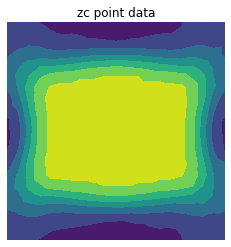

In [129]:
mesh.point_data['zc'] = X1
mesh.plot.point_data('zc')

In [134]:
mesh.points[:,2] = mesh.point_data['zc']

In [135]:
points2 = mesh.points.copy()
points2[:, 2] = 0.
points = np.vstack([mesh.points, points2])
points.shape

(882, 3)

In [136]:
tris2 = mesh.plot.all_tris.copy()
tris2[:, 1:] = np.flip(mesh.plot.all_tris[:, 1:], axis=1)
tris2 += tris2.max() + 1
all_tris = np.vstack([mesh.plot.all_tris, tris2])
cells_list = [('triangle', all_tris)]
meshio_mesh = meshio.Mesh(points/5, cells_list)

In [137]:
meshio_mesh.write('Case_study_core.stl')

In [82]:
w, v = SIMP.FEM.solve(filtre=0)

solving using scipy
solved in :  4.197893857955933  s


In [83]:
w2, v2 = problem.solve(filtre=0)

solving using scipy
solved in :  3.8727762699127197  s


In [84]:
w2[:20]

array([  0.00113796,   0.00227977,   0.00332698,   0.00499596,  68.28437785,  83.88258246,  86.74687189, 116.21616965, 125.73295371, 130.4341891 , 145.25586315, 145.96346566, 147.44274277,
       179.30555307, 180.2844142 , 183.12855847, 204.32446956, 213.53880768, 215.94119392, 218.46406634])

In [85]:
w[:20]

array([  0.00113796,   0.00227977,   0.00332698,   0.00499596,  68.28437785,  83.88258246,  86.74687189, 116.21616965, 125.73295371, 130.4341891 , 145.25586315, 145.96346566, 147.44274277,
       179.30555307, 180.2844142 , 183.12855847, 204.32446956, 213.53880768, 215.94119392, 218.46406634])

In [106]:
# Square mesh
mesh = FEMOL.mesh.rectangle_Q4(1, 1, 20, 20)
# laminates and materials
plies1 = [0, 0, 0, 0]
plies2 = [90]
flax = FEMOL.materials.general_flax()
carbon = FEMOL.materials.general_carbon()
layup1 = FEMOL.laminate.Layup(material=flax, plies=plies1, symetric=True)
layup2 = FEMOL.laminate.Layup(material=carbon, plies=plies2, symetric=False, h_core=0, z_core= 0.025 + carbon.hi)
# FEM problem definition
problem2 = FEMOL.FEM_Problem(mesh=mesh, physics='modal', model='plate')
problem2.define_materials(flax, carbon)
problem2.define_tensors(layup1, layup2)  # thick=1
# First modal solve
w2, v2 = problem2.solve(filtre=0)

solving using scipy
solved in :  3.845643997192383  s


In [89]:
w[:20]

array([  0.00113796,   0.00227977,   0.00332698,   0.00499596,  68.28437785,  83.88258246,  86.74687189, 116.21616965, 125.73295371, 130.4341891 , 145.25586315, 145.96346566, 147.44274277,
       179.30555307, 180.2844142 , 183.12855847, 204.32446956, 213.53880768, 215.94119392, 218.46406634])

In [107]:
w2[:20]

array([  0.00039024,   0.0010451 ,   0.00128806,   0.00214263,   0.00260198,   0.00331011,  38.13044636,  63.04798963, 100.09912362, 175.23636679, 210.15207482, 274.96107889, 285.1782051 ,
       321.25672077, 348.96434628, 380.00141931, 401.23436693, 541.37896228, 586.4219493 , 615.1912109 ])

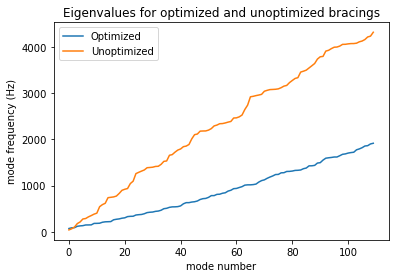

In [110]:
plt.plot(w[w>1][:110], label='Optimized')
plt.plot(w2[w2>1][:110], label='Unoptimized')
plt.xlabel('mode number')
plt.ylabel('mode frequency (Hz)')
plt.title('Eigenvalues for optimized and unoptimized bracings')
plt.legend()

In [98]:
SIMP.lmbds

[38.0088197893943,
 39.329574751706325,
 40.86754412919681,
 42.75387492617245,
 44.91579241110332,
 46.99648937602196,
 48.72198658863426,
 50.3590380473553,
 52.1222516107893,
 54.059631717579826,
 56.12750632562836,
 58.16891154078575,
 59.93740516507964,
 61.33958493450254,
 62.40963471982233,
 63.33010784155336,
 64.1184365818644,
 64.76381487220846,
 65.33097031828589,
 65.79327224625631,
 66.13625174795256,
 66.43789939220757,
 66.6999152191704,
 66.8952248748746,
 67.05750696118596,
 67.19311848305323,
 67.30234999440133,
 67.3934817091746,
 67.48427582051062,
 67.58023163001343,
 67.67023636475668,
 67.7664718512151,
 67.84641540663942,
 67.92810995509076,
 68.00901235337636,
 68.08700107309745,
 68.15249063832584,
 68.20348821587206,
 68.24734183780298,
 68.28437785171126]